In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [3]:
dataset = pd.read_csv("Social_Network_Ads.csv")
print(dataset)

      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]


In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [12]:
print(dataset.shape)

(400, 5)


In [13]:
datatype = dataset.dtypes
print(datatype)

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object


In [14]:
c_count = dataset.groupby("Gender").size()
print(c_count)

Gender
Female    204
Male      196
dtype: int64


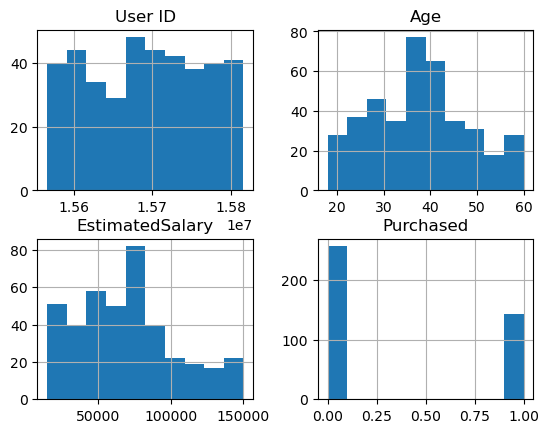

In [15]:
from matplotlib import pyplot
dataset.hist()
pyplot.show()

In [16]:
x = dataset.iloc[:,2:4].values
print(x)

[[    19  19000]
 [    35  20000]
 [    26  43000]
 [    27  57000]
 [    19  76000]
 [    27  58000]
 [    27  84000]
 [    32 150000]
 [    25  33000]
 [    35  65000]
 [    26  80000]
 [    26  52000]
 [    20  86000]
 [    32  18000]
 [    18  82000]
 [    29  80000]
 [    47  25000]
 [    45  26000]
 [    46  28000]
 [    48  29000]
 [    45  22000]
 [    47  49000]
 [    48  41000]
 [    45  22000]
 [    46  23000]
 [    47  20000]
 [    49  28000]
 [    47  30000]
 [    29  43000]
 [    31  18000]
 [    31  74000]
 [    27 137000]
 [    21  16000]
 [    28  44000]
 [    27  90000]
 [    35  27000]
 [    33  28000]
 [    30  49000]
 [    26  72000]
 [    27  31000]
 [    27  17000]
 [    33  51000]
 [    35 108000]
 [    30  15000]
 [    28  84000]
 [    23  20000]
 [    25  79000]
 [    27  54000]
 [    30 135000]
 [    31  89000]
 [    24  32000]
 [    18  44000]
 [    29  83000]
 [    35  23000]
 [    27  58000]
 [    24  55000]
 [    23  48000]
 [    28  79000]
 [    22  1800

In [17]:
y = dataset.iloc[:,4].values
print(y)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1
 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 1 0 1 0 0 1
 1 0 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 0 0
 1 1 0 1 1 1 1 1 0 0 0 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 0 1 1 0 1 0
 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1
 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1]


In [18]:
dataset.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.25,random_state=5)
print(x_train)
print(y_train)

[[    46  23000]
 [    28  44000]
 [    51  23000]
 [    39 106000]
 [    35  50000]
 [    26  86000]
 [    27  84000]
 [    26  80000]
 [    54 108000]
 [    28  59000]
 [    59  42000]
 [    39  42000]
 [    59  88000]
 [    47  51000]
 [    35  73000]
 [    29  75000]
 [    41  60000]
 [    35  60000]
 [    42 149000]
 [    56 133000]
 [    40  61000]
 [    49  28000]
 [    36  50000]
 [    53  82000]
 [    35  22000]
 [    48  33000]
 [    57  60000]
 [    35  88000]
 [    26  15000]
 [    23  20000]
 [    37  52000]
 [    25  79000]
 [    36 126000]
 [    48  35000]
 [    29  80000]
 [    22  18000]
 [    56  60000]
 [    48 141000]
 [    32 117000]
 [    54  70000]
 [    27  31000]
 [    38  50000]
 [    47  20000]
 [    52 150000]
 [    30  62000]
 [    25  87000]
 [    18  44000]
 [    46  82000]
 [    26  52000]
 [    45  26000]
 [    23  82000]
 [    44 139000]
 [    47  23000]
 [    35  25000]
 [    22  63000]
 [    26  35000]
 [    19  76000]
 [    38  55000]
 [    32  8600

In [20]:
print(x_test)
print(y_test)

[[    46  96000]
 [    19  26000]
 [    36  52000]
 [    24  32000]
 [    39  77000]
 [    37  70000]
 [    34  43000]
 [    42  75000]
 [    35  53000]
 [    42  79000]
 [    36 125000]
 [    25  90000]
 [    29  83000]
 [    31  66000]
 [    35  47000]
 [    19  25000]
 [    35 147000]
 [    40  65000]
 [    26  81000]
 [    37  75000]
 [    48 119000]
 [    39  73000]
 [    60  42000]
 [    41  72000]
 [    45  45000]
 [    30  15000]
 [    40  57000]
 [    58  38000]
 [    50  36000]
 [    24  19000]
 [    48 134000]
 [    26  15000]
 [    49  74000]
 [    23  66000]
 [    41  72000]
 [    34 112000]
 [    42  64000]
 [    35  79000]
 [    41  72000]
 [    31  89000]
 [    37 137000]
 [    27  54000]
 [    37 146000]
 [    40  57000]
 [    22  81000]
 [    50  88000]
 [    24  27000]
 [    18  68000]
 [    49 141000]
 [    47 113000]
 [    47  49000]
 [    35  23000]
 [    31  15000]
 [    21  88000]
 [    40  75000]
 [    28  37000]
 [    37 144000]
 [    47 107000]
 [    52  2100

In [21]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)
print(x_train)

[[ 0.77063564 -1.37090753]
 [-0.95681661 -0.74731782]
 [ 1.25048349 -1.37090753]
 [ 0.09884866  1.09375655]
 [-0.28502962 -0.56914934]
 [-1.14875575  0.49986159]
 [-1.05278618  0.44047209]
 [-1.14875575  0.3216931 ]
 [ 1.5383922   1.15314605]
 [-0.95681661 -0.3018966 ]
 [ 2.01824005 -0.80670732]
 [ 0.09884866 -0.80670732]
 [ 2.01824005  0.55925109]
 [ 0.86660521 -0.53945459]
 [-0.28502962  0.11382987]
 [-0.86084704  0.17321936]
 [ 0.2907878  -0.27220186]
 [-0.28502962 -0.27220186]
 [ 0.38675737  2.37063071]
 [ 1.73033134  1.89551474]
 [ 0.19481823 -0.24250711]
 [ 1.05854435 -1.22243379]
 [-0.18906005 -0.56914934]
 [ 1.44242263  0.3810826 ]
 [-0.28502962 -1.40060228]
 [ 0.96257478 -1.07396005]
 [ 1.82630091 -0.27220186]
 [-0.28502962  0.55925109]
 [-1.14875575 -1.60846551]
 [-1.43666446 -1.45999177]
 [-0.09309048 -0.50975984]
 [-1.24472532  0.29199835]
 [-0.18906005  1.68765151]
 [ 0.96257478 -1.01457056]
 [-0.86084704  0.3216931 ]
 [-1.53263403 -1.51938127]
 [ 1.73033134 -0.27220186]
 

In [22]:
print(x_test)

[[ 0.77063564  0.79680907]
 [-1.82054274 -1.28182329]
 [-0.18906005 -0.50975984]
 [-1.34069489 -1.1036548 ]
 [ 0.09884866  0.23260886]
 [-0.09309048  0.02474562]
 [-0.38099919 -0.77701257]
 [ 0.38675737  0.17321936]
 [-0.28502962 -0.48006509]
 [ 0.38675737  0.29199835]
 [-0.18906005  1.65795676]
 [-1.24472532  0.61864058]
 [-0.86084704  0.41077735]
 [-0.6689079  -0.09403337]
 [-0.28502962 -0.65823358]
 [-1.82054274 -1.31151803]
 [-0.28502962  2.31124122]
 [ 0.19481823 -0.12372812]
 [-1.14875575  0.35138785]
 [-0.09309048  0.17321936]
 [ 0.96257478  1.47978827]
 [ 0.09884866  0.11382987]
 [ 2.11420962 -0.80670732]
 [ 0.2907878   0.08413512]
 [ 0.67466608 -0.71762308]
 [-0.76487747 -1.60846551]
 [ 0.19481823 -0.3612861 ]
 [ 1.92227048 -0.92548631]
 [ 1.15451392 -0.98487581]
 [-1.34069489 -1.48968652]
 [ 0.96257478  1.92520949]
 [-1.14875575 -1.60846551]
 [ 1.05854435  0.14352462]
 [-1.43666446 -0.09403337]
 [ 0.2907878   0.08413512]
 [-0.38099919  1.27192504]
 [ 0.38675737 -0.15342286]
 

In [23]:
print(y_train)

[1 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 1 0 1 0 1 0 1 1 0 0 0 0 0 1 1 0 0 1
 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 1 0 0 1 0 0
 0 0 0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0
 0 0 1 1 0 0 1 0 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 0
 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0
 1 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 1
 0 1 1 0 0 0 1 1 1 0 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1
 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0
 0 0 1 1]


In [24]:
print(y_test)

[0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 1 1 0 1 0 0 0 0 1 0
 0 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0 1 1 0 1 0 1
 1 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 1]


In [25]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [26]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [27]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix: ')
print(cm)

Confusion matrix: 
[[59  7]
 [11 23]]


In [28]:
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' %(accuracy_score(y_test, y_pred)*100))

Accuracy: 82.00


In [29]:
precision = precision_score(y_test, y_pred, average='binary')
print('Precision: %.2f' % (precision))

Precision: 0.77


In [30]:
recall = recall_score(y_test, y_pred, average='binary')
print('Recall: %.3f' % (recall))

Recall: 0.676


In [31]:
score = f1_score(y_test, y_pred, average='binary')
print('F-Measure: %.3f' % (score*100))

F-Measure: 71.875


In [32]:
output= classifier.predict(sc_x.transform(([[46,41000]])))
print("Purchased", output)
if output==[1]:
  print("Item will be purchased")
else:
  print("item will not be purchased")

Purchased [1]
Item will be purchased


In [16]:
import streamlit as st
import pickle
import numpy as np

# Load the model
filename = "model.sav"
with open(filename, 'rb') as file:
    classifier = pickle.load(filename)


# Streamlit app
st.title("Purchase Prediction App")
st.write("Welcome to the Purchase Prediction App! This app predicts whether a customer will purchase an item based on their age and estimated salary.")


# User input for age
age = st.number_input("Enter Age", min_value=0, max_value=120, value=34)

# User input for estimated sal

# User input for estimated salary
estimated_salary = st.number_input("Enter Estimated Salary", min_value=0, value=765580)

# Button to make prediction
if st.button("Predict"):

    prediction = classifier.predict([[age, estimated_salary]])
    
    # Display prediction result
    st.subheader("Prediction Result:")
    if prediction == 1:
        st.success("Item will be purchased")
    else:
        st.error("Item will not be purchased")

In [1]:
import sklearn
print(sklearn.__version__)

1.3.0
